# **AML ASSIGNMENT 2 - Q2**

# Leah Dsouza

### **Dataset**
Pima Indians Diabetes Database[2]
* The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/content/diabetes.csv')

**1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Replacing the values where **0** exists with their mean values.

In [10]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data.Glucose.value_counts()

data[data['BloodPressure'] == 0]['BloodPressure'].value_counts()
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data[data['BMI'] == 0]['BMI'].value_counts()
data['BMI'] = data['BMI'].replace(0, data['BMI'].median())

data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())

The 'describe' function,
which generates a report on the DataFrame. This method allows us to obtain an initial understanding of the data's distribution and to identify any outliers.

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The histogram below shows the overall distribution of attributes in the dataset.

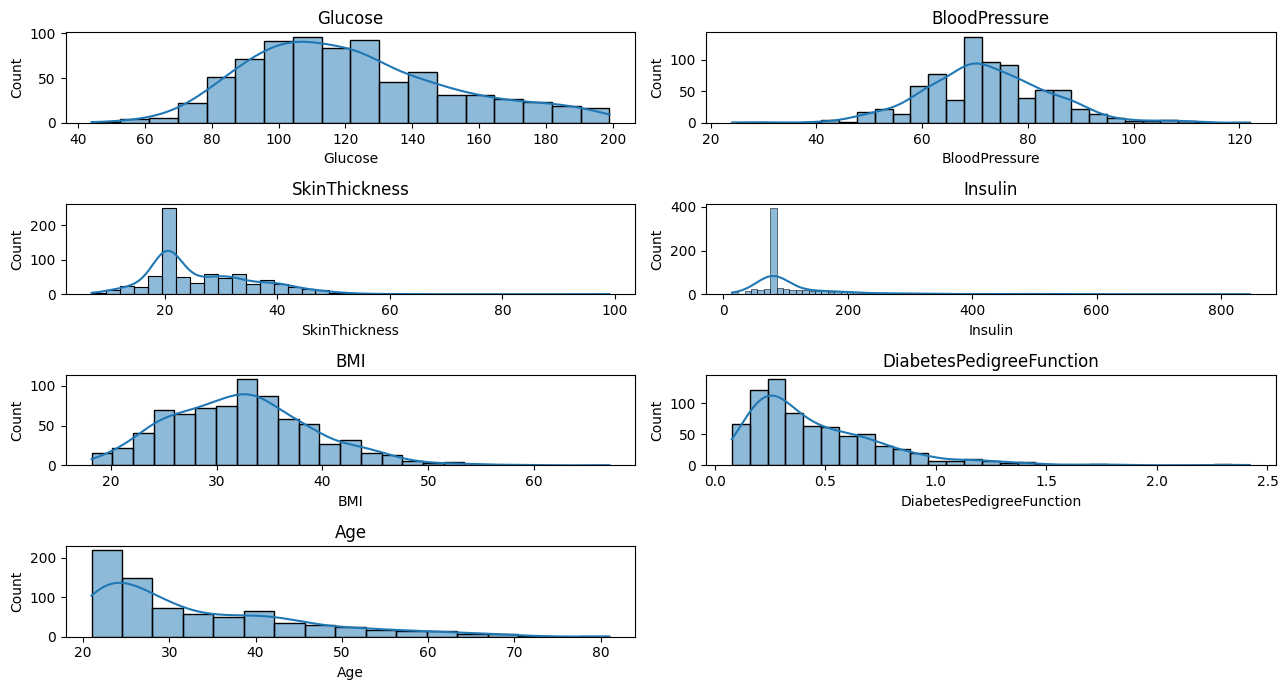

                  Attribute        Mean      Median      Skew       Kurt
0                   Glucose  121.681605  117.000000  0.533225  -0.258820
1             BloodPressure   72.254807   72.000000  0.173050   1.079233
2             SkinThickness   26.606479   23.000000  1.226670   3.904657
3                   Insulin  118.660163   79.799479  3.291825  14.141704
4                       BMI   32.450911   32.000000  0.601059   0.921296
5  DiabetesPedigreeFunction    0.471876    0.372500  1.919911   5.594954
6                       Age   33.240885   29.000000  1.129597   0.643159


In [12]:
def display_statistics_and_histograms(df):
    stats_data = []

    # Create a single figure for all histograms
    plt.figure(figsize=(13, 7))

    for i, col in enumerate(df.columns[1:-1], start=1):
        stats = df[col].describe()
        median = df[col].median()
        skew = df[col].skew()
        kurt = df[col].kurt()
        stats_data.append([col, stats['mean'], median, skew, kurt])

        plt.subplot(4, 2, i)
        sns.histplot(df[str(col)], kde=True)
        plt.title(f"{col}")

    plt.tight_layout()
    plt.show()

    stats_table = pd.DataFrame(stats_data, columns=['Attribute', 'Mean', 'Median', 'Skew', 'Kurt'])
    print(stats_table)

display_statistics_and_histograms(data)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# **2. Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

The heatmap shows the correlation between various attributes.
*   Glucose has a moderate positive correlation of 0.49 with the outcome, which aligns with the common association of high blood sugar with diabetes.



<Axes: >

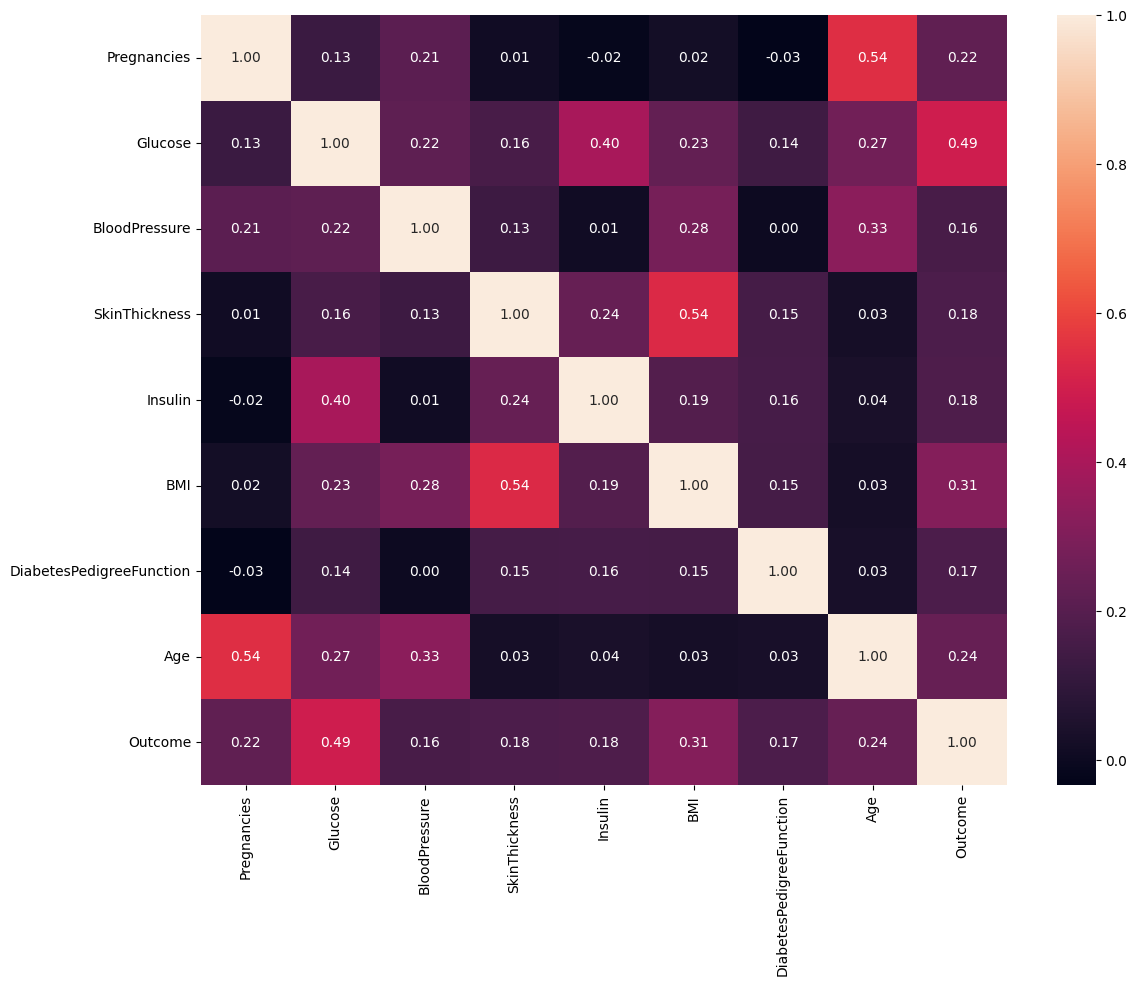

In [14]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True, fmt = ".2f")

In [15]:
corr_matrix = data.corr(method="pearson",numeric_only = True)
corr_matrix["Outcome"].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.492908
BMI                         0.312249
Age                         0.238356
Pregnancies                 0.221898
Insulin                     0.179185
SkinThickness               0.175026
DiabetesPedigreeFunction    0.173844
BloodPressure               0.162986
Name: Outcome, dtype: float64

The pairplot is a collection of scatterplots of all feature pairs in the dataset. Each scatter plot shows the relationship between two features, colored by "Outcome".

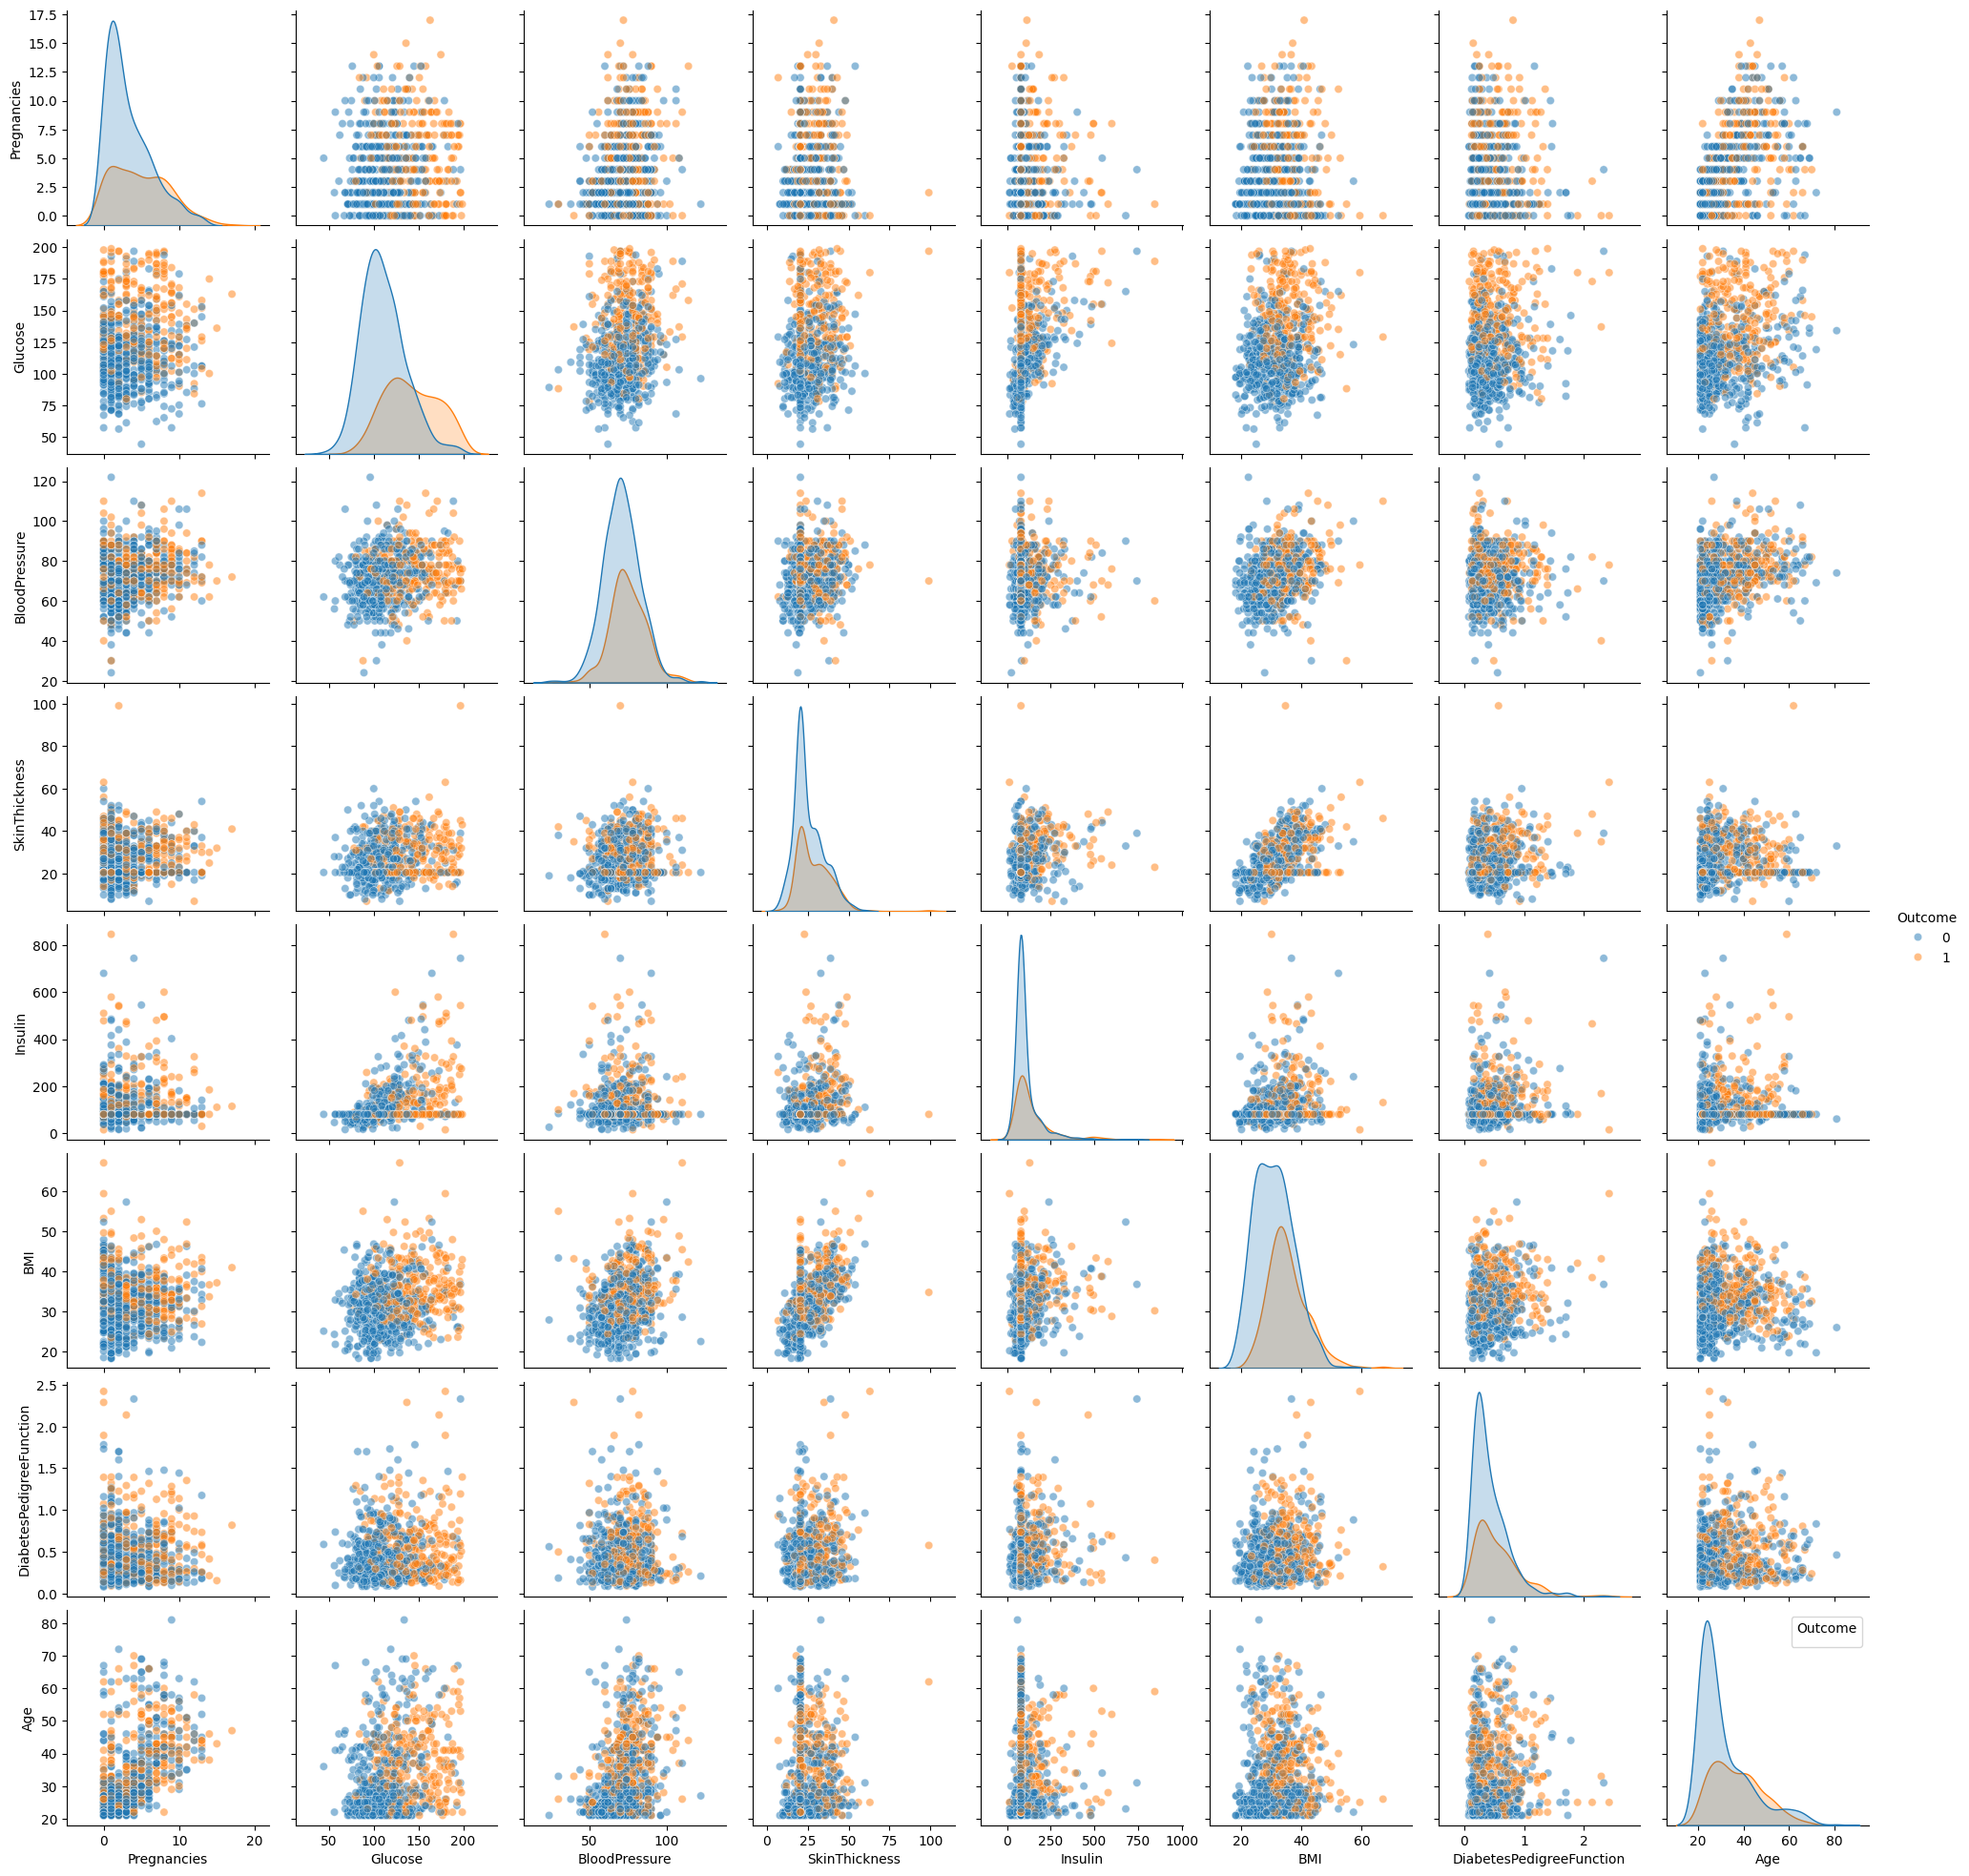

In [16]:
sns.pairplot(data, hue='Outcome', diag_kind='auto', plot_kws={'alpha': 0.5})
plt.legend(title='Outcome', loc='upper right')
plt.show()

# **3. Splitting of the data**

Using 60% data for training, 20% for validation and 20% for testing.
 - In the first split, 60% of the data is allocated to the training set, while the remaining 40% is grouped together.
Following this, the combined validation and test data is further split and approximately 20% of the total data is assigned to each of the validation and test sets.


In [17]:
train_size = 0.6
validation_size = 0.2
test_size = 0.2

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data.drop('Outcome', axis=1),
                                                    data['Outcome'],
                                                    test_size=(validation_size + test_size),
                                                    random_state=42, stratify=data['Outcome'])

X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp,
                                                              test_size=test_size/(validation_size + test_size),
                                                              random_state=42, stratify = y_temp)

# Print the shapes of the resulting sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_validation.shape, y_validation.shape)
print("Test set shapes:", X_test.shape, y_test.shape)


Training set shapes: (460, 8) (460,)
Validation set shapes: (154, 8) (154,)
Test set shapes: (154, 8) (154,)


We can clearly see that the outcome has similar representation in all the 3 sets.

In [18]:
print("Representativeness of 'Outcome' in the entire dataset:")
print(data['Outcome'].value_counts(normalize=True))
print("\nRepresentativeness of 'Outcome' in the Validation Set:")
print(y_validation.value_counts(normalize=True))
print("\nRepresentativeness of 'Outcome' in the Test Set:")
print(y_test.value_counts(normalize=True))

Representativeness of 'Outcome' in the entire dataset:
0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Representativeness of 'Outcome' in the Validation Set:
0    0.649351
1    0.350649
Name: Outcome, dtype: float64

Representativeness of 'Outcome' in the Test Set:
0    0.655844
1    0.344156
Name: Outcome, dtype: float64


In [19]:
print("Summary of Entire Dataset:")
print(data.describe().transpose())
# Short summary of the validation set
print("\nSummary of Validation Set:")
print(y_validation.describe().transpose())
# Short summary of the testing set
print("\nSummary of Testing Set:")
print(y_test.describe().transpose())

Summary of Entire Dataset:
                          count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000   1.000000   
Glucose                   768.0  121.681605  30.436016  44.000  99.750000   
BloodPressure             768.0   72.254807  12.115932  24.000  64.000000   
SkinThickness             768.0   26.606479   9.631241   7.000  20.536458   
Insulin                   768.0  118.660163  93.080358  14.000  79.799479   
BMI                       768.0   32.450911   6.875366  18.200  27.500000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078   0.243750   
Age                       768.0   33.240885  11.760232  21.000  24.000000   
Outcome                   768.0    0.348958   0.476951   0.000   0.000000   

                                 50%        75%     max  
Pregnancies                 3.000000    6.00000   17.00  
Glucose                   117.000000  140.25000  199.00  
BloodPressure              7

In [20]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# **4. Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters.**

## **A) Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations**.

* A Randomized search is conducted, exploring hyperparameters such as C (regularization strength),
solver, and max_iter (maximum number of iterations).
- The best classifier and hyperparameters are determined through cross-validation.

In [37]:
param_dist = {
'C': [0.1, 1.0, 5.0, 10.0, 50.0],
'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'max_iter': [10, 50, 100, 500, 1000]
}
grid_search = RandomizedSearchCV(LogisticRegression(), param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs = -1)

grid_search.fit(X_train, y_train)
best_classifier_lr = grid_search.best_estimator_
best_hyperparameters_lr = grid_search.best_params_
y_train_pred_lr = best_classifier_lr.predict(X_train)
y_val_pred_lr = best_classifier_lr.predict(X_validation)
y_test_pred_lr = best_classifier_lr.predict(X_test)
print("Best Hyperparameters:", best_hyperparameters_lr)

Best Hyperparameters: {'solver': 'liblinear', 'max_iter': 100, 'C': 5.0}


In [38]:
def evaluate_classifier(y_true, y_pred, label):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')
  print(f"{label} Accuracy: {accuracy:.4f}")
  print(f"{label} Precision: {precision:.4f}")
  print(f"{label} Recall: {recall:.4f}")
  print(f"{label} F1 Score: {f1:.4f}")

In [39]:
evaluate_classifier(y_train, y_train_pred_lr, "Training")

Training Accuracy: 0.7870
Training Precision: 0.7830
Training Recall: 0.7870
Training F1 Score: 0.7801


In [40]:
evaluate_classifier(y_validation, y_val_pred_lr, "Validation")

Validation Accuracy: 0.7532
Validation Precision: 0.7497
Validation Recall: 0.7532
Validation F1 Score: 0.7509


In [41]:
evaluate_classifier(y_test, y_test_pred_lr, "Testing")

Testing Accuracy: 0.7403
Testing Precision: 0.7316
Testing Recall: 0.7403
Testing F1 Score: 0.7310


**Impact of Hyperparameter - C**
* The value of C stabilizes after 10.0. Hence for this graph a C value of 10.0 would be a great choice for the final model.



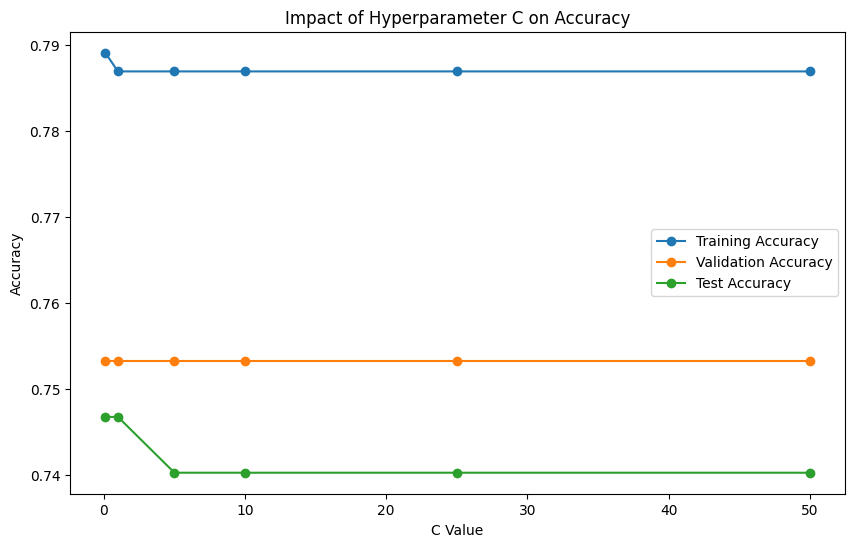

In [42]:
C_values = [0.1, 1.0, 5.0, 10.0, 25.0, 50.0]


# Create empty lists to store accuracies
train_accuracies, val_accuracies, test_accuracies = [], [], []

# Loop through C values with vectorization
for c in C_values:
  # Train model with current C
  lr_model = LogisticRegression(multi_class='multinomial', C=c, solver='lbfgs', max_iter=100)
  lr_model.fit(X_train, y_train)

  y_train_pred = lr_model.predict(X_train)
  y_val_pred = lr_model.predict(X_validation)
  y_test_pred = lr_model.predict(X_test)
  # Calculate accuracy
  train_accuracy = accuracy_score(y_train, y_train_pred)
  val_accuracy = accuracy_score(y_validation, y_val_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  # Append accuracies to lists
  train_accuracies.append(train_accuracy)
  val_accuracies.append(val_accuracy)
  test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(C_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter C on Accuracy')
plt.legend()
plt.show()

**Impact of Hyperparameter Solver on Accuracy**
* All the solvers perform similarly on training, validation and test data.
* In this specific case, the choice of solver does not have a significant impact on the model's
performance.
* There is a significant gap between training and validation/test accuracies, which suggests
overfitting.

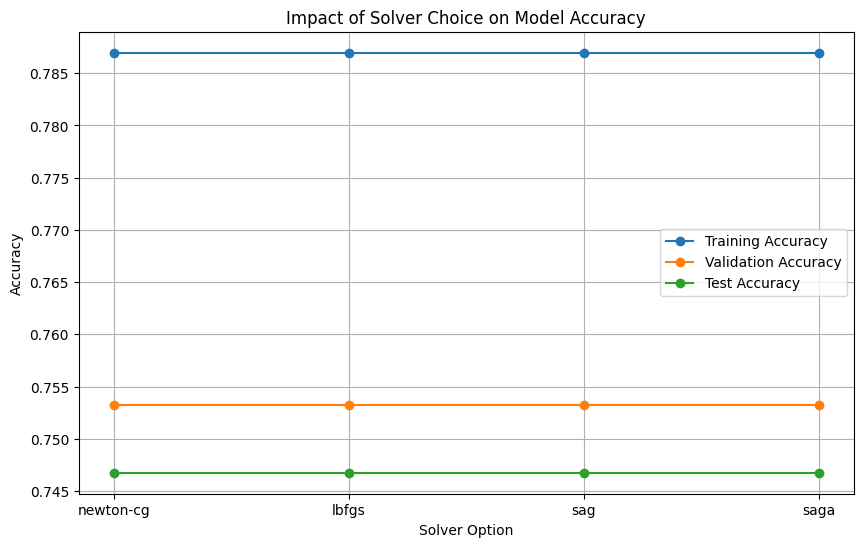

In [43]:
# Define solver options and initialize accuracy lists
solver_options = ['newton-cg', 'lbfgs', 'sag', 'saga']
train_accuracies, val_accuracies, test_accuracies = [], [], []

# Evaluate the model for each solver option
for solver_option in solver_options:
    lr_model = LogisticRegression(multi_class='multinomial', C=1, solver=solver_option, max_iter=100)
    lr_model.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, lr_model.predict(X_train)))
    val_accuracies.append(accuracy_score(y_validation, lr_model.predict(X_validation)))
    test_accuracies.append(accuracy_score(y_test, lr_model.predict(X_test)))

# Plot the accuracy results
plt.figure(figsize=(10, 6))
plt.plot(solver_options, train_accuracies, 'o-', label='Training Accuracy')
plt.plot(solver_options, val_accuracies, 'o-', label='Validation Accuracy')
plt.plot(solver_options, test_accuracies, 'o-', label='Test Accuracy')
plt.xlabel('Solver Option')
plt.ylabel('Accuracy')
plt.title('Impact of Solver Choice on Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Impact of Hyperparameter max number of iterations**
* In this specific case, the choice of number of iterations does not have a significant impact on the model's
performance.
* There is a significant gap between training and validation/test accuracies, which suggests
overfitting.

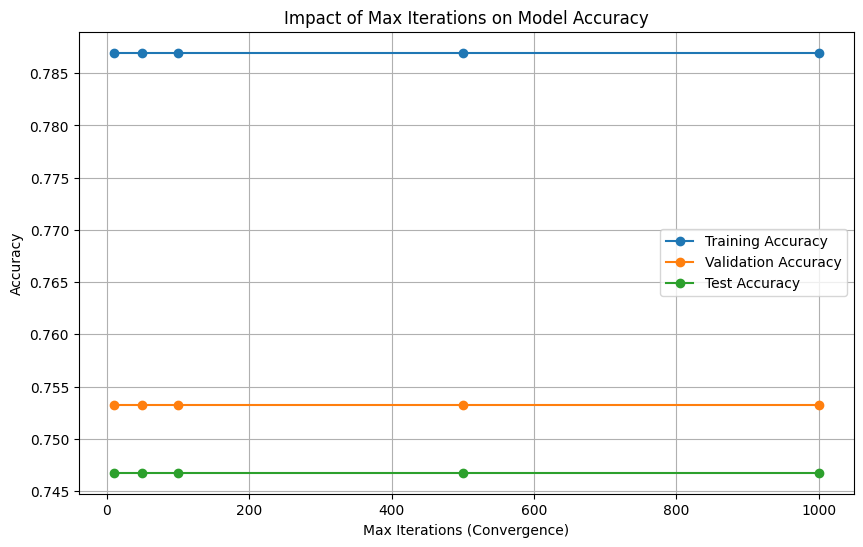

In [44]:
# Define max_iter options and initialize accuracy lists
max_iter_options = [10, 50, 100, 500, 1000]
train_accuracies, val_accuracies, test_accuracies = [], [], []

# Evaluate the model for each max_iter option
for max_iter_option in max_iter_options:
    lr_model = LogisticRegression(multi_class='multinomial', C=1, solver='lbfgs', max_iter=max_iter_option)
    lr_model.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, lr_model.predict(X_train)))
    val_accuracies.append(accuracy_score(y_validation, lr_model.predict(X_validation)))
    test_accuracies.append(accuracy_score(y_test, lr_model.predict(X_test)))

# Plot the accuracy results
plt.figure(figsize=(10, 6))
plt.plot(max_iter_options, train_accuracies, 'o-', label='Training Accuracy')
plt.plot(max_iter_options, val_accuracies, 'o-', label='Validation Accuracy')
plt.plot(max_iter_options, test_accuracies, 'o-', label='Test Accuracy')
plt.xlabel('Max Iterations (Convergence)')
plt.ylabel('Accuracy')
plt.title('Impact of Max Iterations on Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## **B) Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.**

* Randomized search is employed to explore hyperparameters including C (regularization parameter),
kernel (choice of kernel function), degree (degree of polynomial kernel), and gamma (kernel
coefficient).
* The best classifier and hyperparameters are identified.
* Performance metrics are calculated and reported for each dataset (training, validation, testing).

In [46]:
param_dist_svm = {
    'C': [0.1, 1.0, 5.0, 10.0, 50.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': [0.1, 1.0, 5.0, 10.0]
}
grid_search_svm = RandomizedSearchCV(SVC(probability = True), param_dist_svm, n_iter=10, cv=5, scoring='accuracy', n_jobs = -1)

grid_search_svm.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [0.1, 1.0, 5.0, 10.0, 50.0],
                                        'degree': [2, 3, 4],
                                        'gamma': [0.1, 1.0, 5.0, 10.0],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='accuracy')

In [47]:
best_classifier_svm = grid_search_svm.best_estimator_
best_hyperparameters_svm = grid_search_svm.best_params_
print("Best Hyperparameters for SVM from Grid Search:", best_hyperparameters_svm)

Best Hyperparameters for SVM from Grid Search: {'kernel': 'linear', 'gamma': 5.0, 'degree': 2, 'C': 0.1}


In [48]:
y_train_pred_svm = best_classifier_svm.predict(X_train)
y_val_pred_svm = best_classifier_svm.predict(X_validation )
y_test_pred_svm = best_classifier_svm.predict(X_test)

In [49]:
evaluate_classifier(y_train, y_train_pred_svm, "Training")

Training Accuracy: 0.7978
Training Precision: 0.7956
Training Recall: 0.7978
Training F1 Score: 0.7901


In [50]:
evaluate_classifier(y_validation, y_val_pred_svm, "Validation")

Validation Accuracy: 0.7273
Validation Precision: 0.7201
Validation Recall: 0.7273
Validation F1 Score: 0.7216


In [51]:
evaluate_classifier(y_test, y_test_pred_svm, "Testing")

Testing Accuracy: 0.7403
Testing Precision: 0.7313
Testing Recall: 0.7403
Testing F1 Score: 0.7289


**Impact of hyperparameter - C**
* The graph illustrates the relationship between the regularization parameter C and the accuracy of a model on the training, validation, and testing sets.
*As C increases, the model's accuracy typically improves initially due to reduced regularization, allowing for better fitting to the training data. However, beyond a certain point, increasing C may lead to overfitting, causing the accuracy to stabilize or even decrease. The behavior is consistent across all three datasets, with accuracy stabilizing after reaching an optimal point.
* This suggests the importance of selecting an appropriate value of C to balance model complexity and generalization performance.

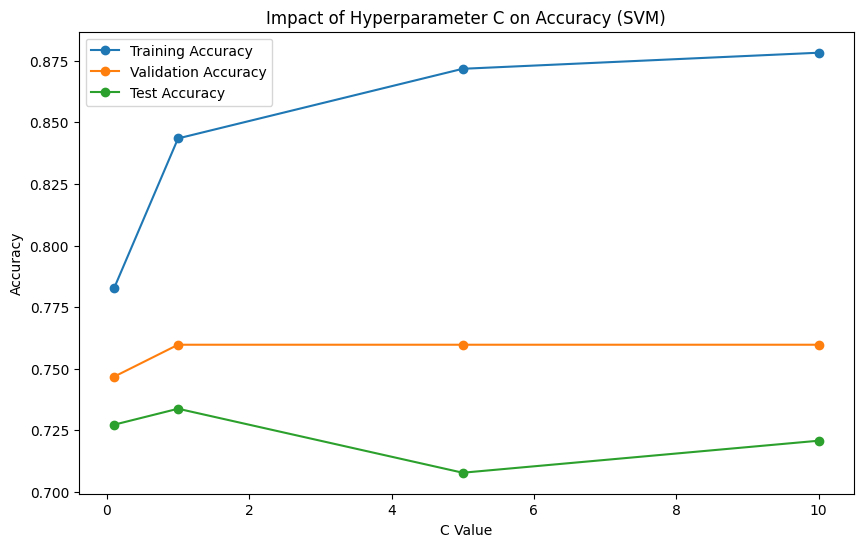

In [52]:
# Define the range of C values you want to visualize
C_values = [0.1, 1.0, 5.0, 10.0]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different C values
for c in C_values:
  # Train the model with the specified C value
  svm_model = SVC(C=c, kernel='rbf', gamma=0.1)
  svm_model.fit(X_train, y_train)
  # Predict on different sets
  y_train_pred = svm_model.predict(X_train)
  y_val_pred = svm_model.predict(X_validation)
  y_test_pred = svm_model.predict(X_test)
  # Calculate accuracy
  train_accuracy = accuracy_score(y_train, y_train_pred)
  val_accuracy = accuracy_score(y_validation, y_val_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  # Append accuracies to lists
  train_accuracies.append(train_accuracy)
  val_accuracies.append(val_accuracy)
  test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(C_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter C on Accuracy (SVM)')
plt.legend()
plt.show()

**Impact of Hyperparameter kernel on Accuracy**
* The SVM model yields the best accuracy of all the three sets for the rbf kernel.

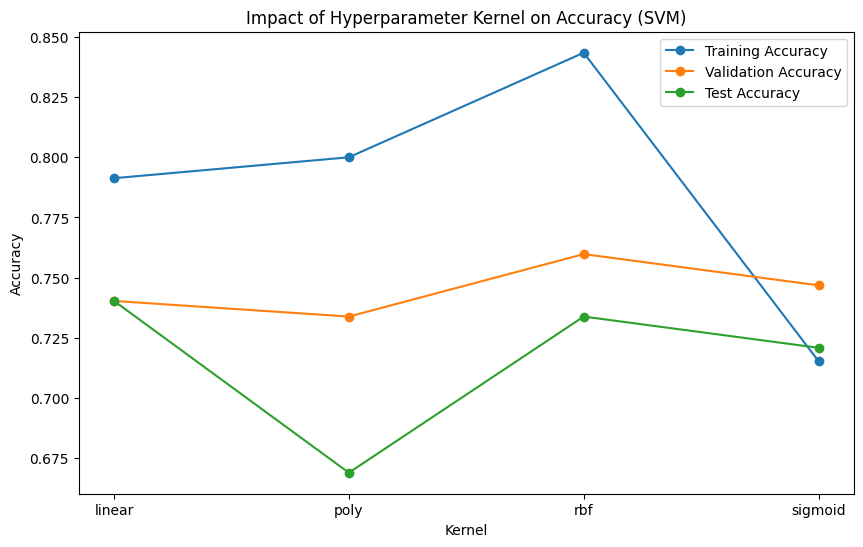

In [53]:
# Define the kernels to visualize
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different kernels
for kernel in kernels:
  # Train the model with the specified kernel
  svm_model = SVC(C=1.0, kernel=kernel, gamma=0.1)
  svm_model.fit(X_train, y_train)
  # Predict on different sets
  y_train_pred = svm_model.predict(X_train)
  y_val_pred = svm_model.predict(X_validation)
  y_test_pred = svm_model.predict(X_test)
  # Calculate accuracy
  train_accuracy = accuracy_score(y_train, y_train_pred)
  val_accuracy = accuracy_score(y_validation, y_val_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  # Append accuracies to lists
  train_accuracies.append(train_accuracy)
  val_accuracies.append(val_accuracy)
  test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(kernels, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(kernels, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(kernels, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Kernel on Accuracy (SVM)')
plt.legend()
plt.show()

**Impact of hyperparameter - Degree of Polynomial Kernel**
* The degree of polynomial doesn't have much effect on the model performance.
* There is a significant gap between training and validation/test accuracies, which suggests
overfitting.

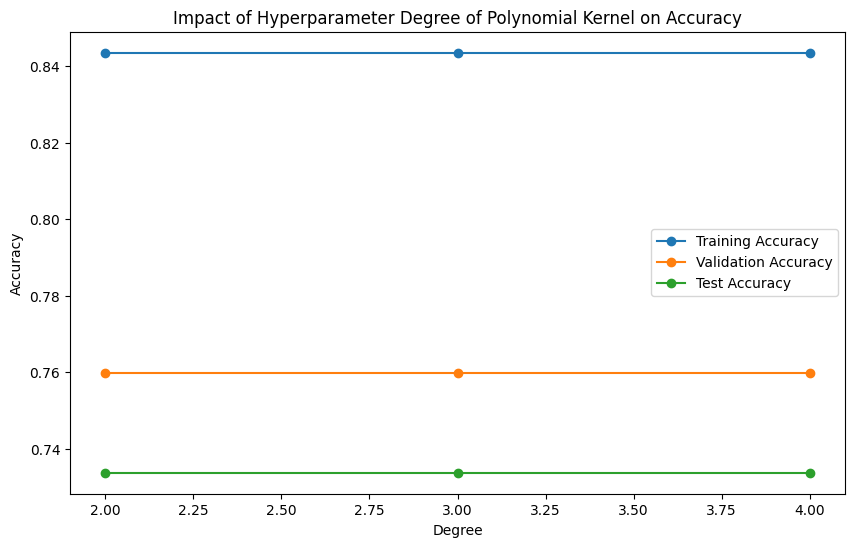

In [54]:
degrees = [2, 3, 4]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different degrees
for degree in degrees:
    # Train the model with the specified degree
    svm_model = SVC(C=1.0, kernel='rbf', degree=degree, gamma=0.1)
    svm_model.fit(X_train, y_train)

    # Predict on different sets
    y_train_pred = svm_model.predict(X_train)
    y_val_pred = svm_model.predict(X_validation)
    y_test_pred = svm_model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_validation, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(degrees, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(degrees, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Degree of Polynomial Kernel on Accuracy')
plt.legend()
plt.show()

**Impact of Hyperparameter - Gamma**
* As the gamma value increases, the training accuracy increases and stabilizes further.
* For testing and validation, as the gamma value increases the accuracy decreases.
* Gamma value of 10 is the most optimal for this model

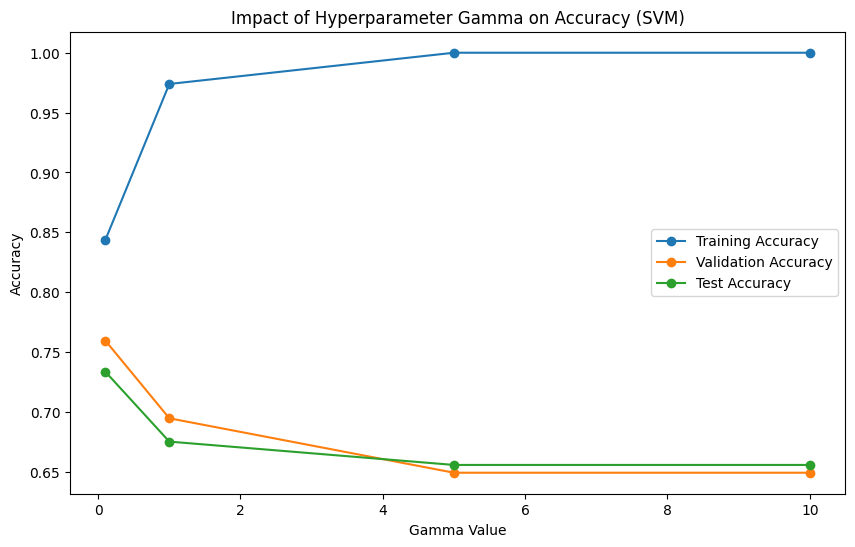

In [55]:
gamma_values = [0.1, 1.0, 5.0, 10.0]
# Empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Looping through different gamma values
for gamma_val in gamma_values:
  # Train the model with the specified gamma value
  svm_model_gamma = SVC(C=1.0, kernel='rbf', gamma=gamma_val)
  svm_model_gamma.fit(X_train, y_train)
  # Predict on different sets
  y_train_pred_gamma = svm_model_gamma.predict(X_train)
  y_val_pred_gamma = svm_model_gamma.predict(X_validation)
  y_test_pred_gamma = svm_model_gamma.predict(X_test)
  # Calculate accuracy
  train_accuracy_gamma = accuracy_score(y_train, y_train_pred_gamma)
  val_accuracy_gamma = accuracy_score(y_validation, y_val_pred_gamma)
  test_accuracy_gamma = accuracy_score(y_test, y_test_pred_gamma)
  # Append accuracies to lists
  train_accuracies.append(train_accuracy_gamma)
  val_accuracies.append(val_accuracy_gamma)
  test_accuracies.append(test_accuracy_gamma)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(gamma_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(gamma_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Gamma Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Gamma on Accuracy (SVM)')
plt.legend()
plt.show()


## **4) Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.**

* Grid search explores hyperparameters such as the number of trees(n_estimators), max_depth min_samples_split, and min_samples_leaf.
* Best classifier and hyperparameters are determined via cross-validation.
* Performance metrics for training, validation, and testing are reported.

In [56]:
from sklearn.ensemble import RandomForestClassifier
# Define hyperparameter grid
param_grid_rf = {
'n_estimators': [100, 200, 500],
'max_depth': [None, 5, 10, 20],
'min_samples_split': [1,2,4,5],
'min_samples_leaf': [1, 2, 4, 5]
}

In [57]:
grid_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv = 5)
grid_search_rf.fit(X_train, y_train)
best_classifier_rf = grid_search_rf.best_estimator_
best_hyperparameters_rf = grid_search_rf.best_params_
# Print Best Hyperparameters
print("Best Hyperparameters:", best_hyperparameters_rf)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': None}


In [58]:
# Predictions and evaluation
y_train_pred_rf = best_classifier_rf.predict(X_train)
y_val_pred_rf = best_classifier_rf.predict(X_validation)
y_test_pred_rf = best_classifier_rf.predict(X_test)

In [59]:
# Evaluate on training set
evaluate_classifier(y_train, y_train_pred_rf, "Training")

Training Accuracy: 0.9130
Training Precision: 0.9140
Training Recall: 0.9130
Training F1 Score: 0.9116


In [60]:
# Evaluate on validation set
evaluate_classifier(y_validation, y_val_pred_rf, "Validation")

Validation Accuracy: 0.7403
Validation Precision: 0.7364
Validation Recall: 0.7403
Validation F1 Score: 0.7378


In [61]:
# Evaluate on test set
evaluate_classifier(y_test, y_test_pred_rf, "Testing")

Testing Accuracy: 0.7078
Testing Precision: 0.7019
Testing Recall: 0.7078
Testing F1 Score: 0.7041


**Feature Importance**
* Glucose and BMI are the two most important features that contrbute to this Random Forest Classifier.



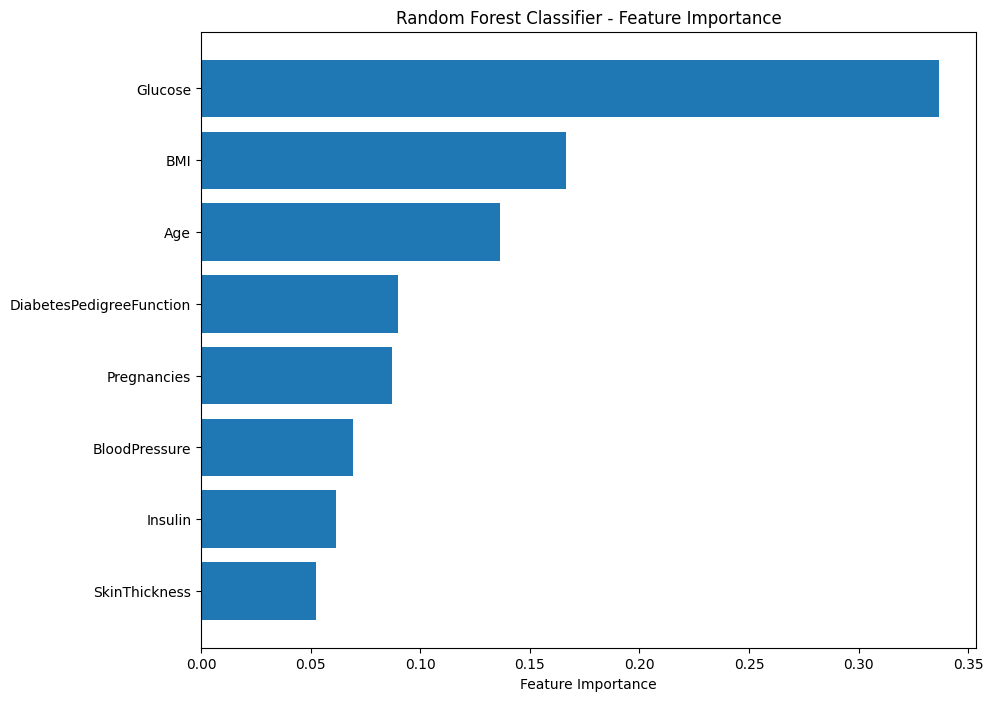

In [63]:
# Feature Importance
attributes = data.columns[:-1]
feature_importance = best_classifier_rf.feature_importances_
sorted_idx = feature_importance.argsort()
# Plot Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [attributes[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()

**Impact of Hyperparameter - Number of trees**
* As the number of trees increases, the training accuracy tends to increase slightly.
* There is a significant difference in the accuracies of training set as compared to validation and test. This is because Random forest fits the data well on training set.

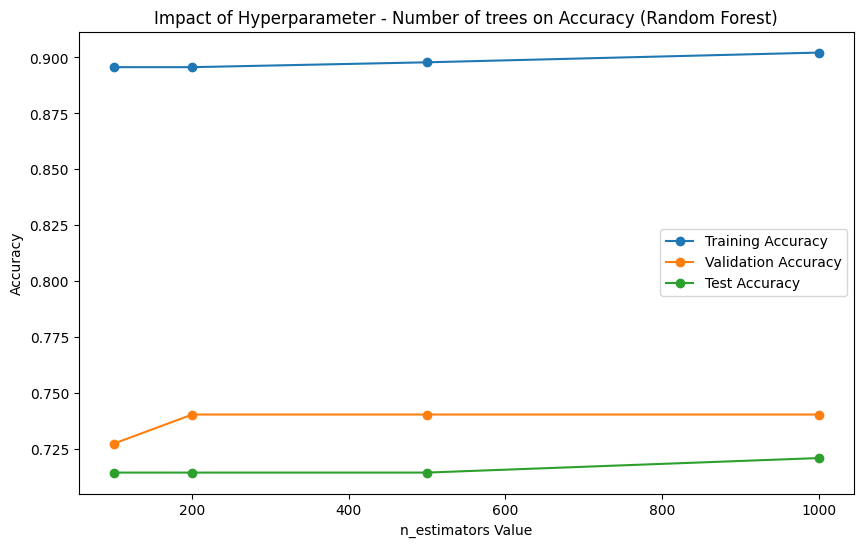

In [65]:
# Define the range of n_estimators values you want to visualize
n_estimators_values = [100, 200, 500, 1000]

# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Loop through different n_estimators values
for n_estimators_value in n_estimators_values:
    # Train the model with the specified n_estimators value
    rf_model = RandomForestClassifier(n_estimators=n_estimators_value, max_depth=6, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on different sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_validation)
    y_test_pred = rf_model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_validation, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(n_estimators_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('n_estimators Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter - Number of trees on Accuracy (Random Forest)')
plt.legend()
plt.show()


**Impact of Hyperparameter - Max Depth**
* As the maximum depth of the trees increases, the training, validation and test accuracy tends to improve. This is expected, as deeper trees can better fit the training data, potentially leading to overfitting.
* There is a significant gap between training and validation/test accuracies, which suggests overfitting.

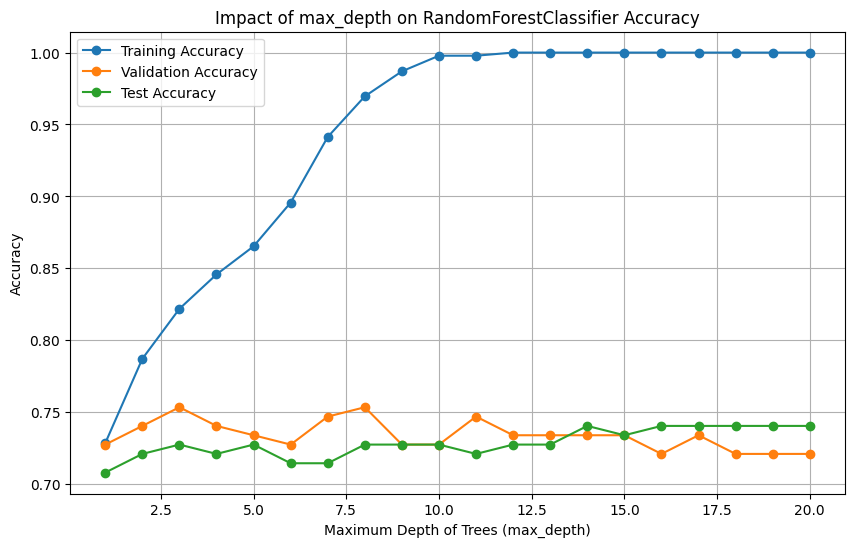

In [68]:
# Define the range of max_depth values you want to visualize
max_depth_values = list(range(1, 21))  # Extended to a larger range for a more detailed visualization

# Store performance metrics
accuracy_metrics = {'train': [], 'val': [], 'test': []}

# Loop through different max_depth values
for max_depth_value in max_depth_values:
    # Train the model with the specified max_depth value
    rf_model = RandomForestClassifier(max_depth=max_depth_value, random_state=42)
    rf_model.fit(X_train, y_train)

    # Store accuracies in the corresponding lists
    accuracy_metrics['train'].append(accuracy_score(y_train, rf_model.predict(X_train)))
    accuracy_metrics['val'].append(accuracy_score(y_validation, rf_model.predict(X_validation)))
    accuracy_metrics['test'].append(accuracy_score(y_test, rf_model.predict(X_test)))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracy_metrics['train'], 'o-', label='Training Accuracy')
plt.plot(max_depth_values, accuracy_metrics['val'], 'o-', label='Validation Accuracy')
plt.plot(max_depth_values, accuracy_metrics['test'], 'o-', label='Test Accuracy')
plt.xlabel('Maximum Depth of Trees (max_depth)')
plt.ylabel('Accuracy')
plt.title('Impact of max_depth on RandomForestClassifier Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Impact of Hyperparameter - Minimum number of samples required to split an internal node**
* The accuracy increases as the minimum samples increases. It actually increases till 3 then decreases and again increases.
* There is a significant gap between training and validation/test accuracies, which suggests overfitting.

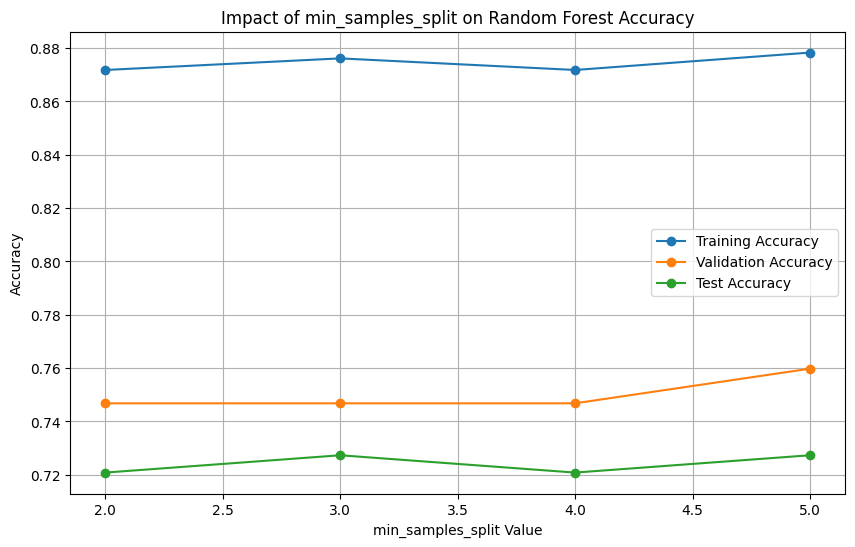

In [70]:
# Define the range of min_samples_split values you want to visualize
min_samples_split_values = [2, 3, 4, 5]

# Function to train the model and calculate accuracies
def evaluate_rf_model(min_samples_split_value):
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=min_samples_split_value, random_state=42)
    rf_model.fit(X_train, y_train)
    return {
        'train': accuracy_score(y_train, rf_model.predict(X_train)),
        'val': accuracy_score(y_validation, rf_model.predict(X_validation)),
        'test': accuracy_score(y_test, rf_model.predict(X_test))
    }

# Evaluate model and store accuracies for different values
accuracies = [evaluate_rf_model(value) for value in min_samples_split_values]

# Extract accuracies for plotting
train_accuracies = [acc['train'] for acc in accuracies]
val_accuracies = [acc['val'] for acc in accuracies]
test_accuracies = [acc['test'] for acc in accuracies]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_accuracies, 'o-', label='Training Accuracy')
plt.plot(min_samples_split_values, val_accuracies, 'o-', label='Validation Accuracy')
plt.plot(min_samples_split_values, test_accuracies, 'o-', label='Test Accuracy')
plt.xlabel('min_samples_split Value')
plt.ylabel('Accuracy')
plt.title('Impact of min_samples_split on Random Forest Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Impact of hyperparameter - Minimum number of samples required to be at a leaf node.**
* The training accuracy tends to decrease as the minimum number of samples required to be at a leaf node increases.
* The test accuracy shows a gradual increase and then decreases further as the sample size increases
* This suggests that when leaves are required to have a higher number of samples, the model becomes less complex and less prone to overfitting.

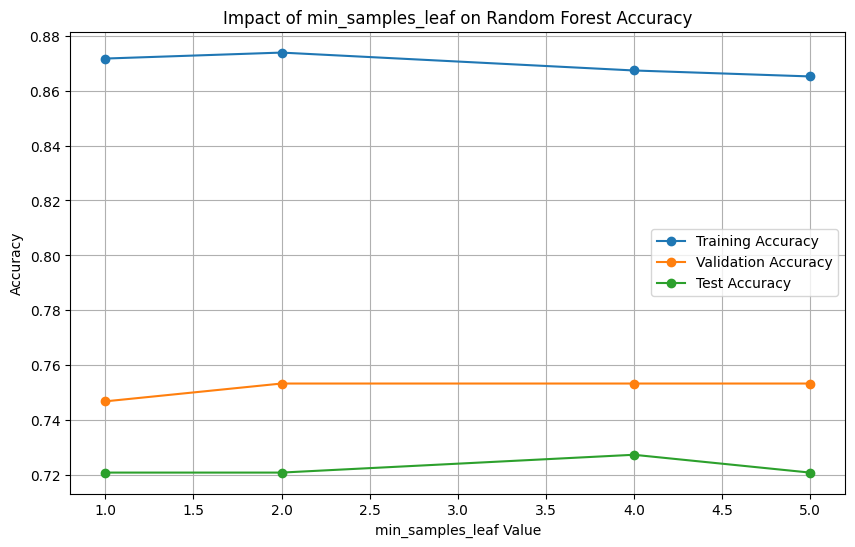

In [69]:
# Define the range of min_samples_leaf values you want to visualize
min_samples_leaf_values = [1, 2, 4, 5]

# Function to train the model and calculate accuracies
def evaluate_rf_model(min_samples_leaf_value):
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_leaf=min_samples_leaf_value, random_state=42)
    rf_model.fit(X_train, y_train)
    return {
        'train': accuracy_score(y_train, rf_model.predict(X_train)),
        'val': accuracy_score(y_validation, rf_model.predict(X_validation)),
        'test': accuracy_score(y_test, rf_model.predict(X_test))
    }

# Evaluate model and store accuracies for different values
accuracies = [evaluate_rf_model(value) for value in min_samples_leaf_values]

# Extract accuracies for plotting
train_accuracies = [acc['train'] for acc in accuracies]
val_accuracies = [acc['val'] for acc in accuracies]
test_accuracies = [acc['test'] for acc in accuracies]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_accuracies, 'o-', label='Training Accuracy')
plt.plot(min_samples_leaf_values, val_accuracies, 'o-', label='Validation Accuracy')
plt.plot(min_samples_leaf_values, test_accuracies, 'o-', label='Test Accuracy')
plt.xlabel('min_samples_leaf Value')
plt.ylabel('Accuracy')
plt.title('Impact of min_samples_leaf on Random Forest Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **5. Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings.**

* Ensemble learning stands as a machine learning approach that fuses the forecasts of numerous individual models or classifiers to arrive at a definitive prediction. The primary objective of ensemble methods is to enhance the overall predictive capability and resilience of a model by
harnessing the unique strengths of diverse base models.
* The ensemble model - Voting Classifier is trained on the training data by evaluating the best hyperparameters on each model.
* **Hard Voting Classifier** is implemented based on weights assigned to each classifier to evaluate higher accuracy on the ensemble model.
* Performance metrics are reported for the validation and testing sets.
Both the validation and test accuracy of each model is compared with the help of a bar plot.

In [71]:
voting_classifier = VotingClassifier(estimators=[
    ('lr', best_classifier_lr),
    ('rf', best_classifier_rf),
    ('svc', best_classifier_svm)
], voting='hard', weights = [0.4634, 0.2695,0.2671])

In [72]:
# Train the ensemble model
voting_classifier.fit(X_train, y_train)
# Evaluate on validation set
y_val_pred_ensemble = voting_classifier.predict(X_validation)
val_accuracy_ensemble = accuracy_score(y_validation, y_val_pred_ensemble)
# Evaluate on test set
y_test_pred_ensemble = voting_classifier.predict(X_test)
test_accuracy_ensemble = accuracy_score(y_test, y_test_pred_ensemble)

In [73]:
evaluate_classifier(y_validation, y_val_pred_ensemble, "Ensemble (Validation)")

Ensemble (Validation) Accuracy: 0.7468
Ensemble (Validation) Precision: 0.7423
Ensemble (Validation) Recall: 0.7468
Ensemble (Validation) F1 Score: 0.7437


In [75]:
accuracy_lr = accuracy_score(y_validation, y_val_pred)
accuracy_rf = accuracy_score(y_validation, y_val_pred_rf)
accuracy_svm = accuracy_score(y_validation, y_val_pred_svm)
accuracy_ensemble = accuracy_score(y_validation  , y_val_pred_ensemble)

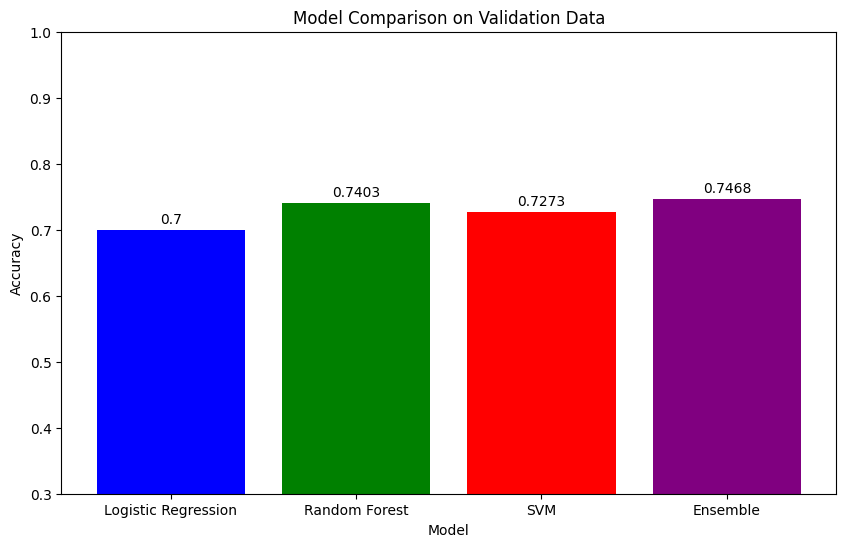

In [77]:
# Define model names and their corresponding accuracies
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Ensemble']
accuracies = [accuracy_lr,
accuracy_rf,
accuracy_svm,
accuracy_ensemble]
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison on Validation Data')
plt.ylim(0.3, 1.0)
for i, v in enumerate(accuracies):
  plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
plt.show()

#### **It is observed that the Ensemble model outperforms the rest on the Validation set with an accuracy of 0.7468.**

### **Test Set Accuracy using Ensemble**

In [78]:
evaluate_classifier(y_test, y_test_pred_ensemble, "Ensemble (Test)")

Ensemble (Test) Accuracy: 0.7338
Ensemble (Test) Precision: 0.7242
Ensemble (Test) Recall: 0.7338
Ensemble (Test) F1 Score: 0.7232


# **Findings**

* Ensemble methods consistently outperform individual base models in terms of accuracy for validation data.
* This ensemble approach works well when individual models don't do a great job, improving overall accuracy and reliability. However, its success depends on how well we fine-tune the settings through testing and cross-validation.
* Visualizing impact of hyperparameters through line graphs, and comparing accuracies through bar graphs proved to be a significant step in determining which model performs the best given the hyperparameters.
* The ensemble method achieved an accuracy of 0.7338.

# References
1. Book: https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/
2. Dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
3. https://towardsdatascience.com/
4. https://towardsdatascience.com/